The problem addressed here is to predict the global temperature change by country using the Dickey-Fuller test. The Dickey-Fuller test is a statistical test used to determine whether a given time series is stationary or not. Stationarity is a crucial assumption in time series analysis, and the Dickey-Fuller test is one of the most widely used tests to check the stationarity of a time series.

The dataset used in the  code is the "Global Temperature Change by Country" dataset, which contains information on the average temperature change in degrees Celsius for various countries from the year 1880 to 2018. The dataset has 169 unique countries, and each country has its own time series data.

The  code uses various functions from Python libraries such as pandas, numpy, matplotlib, and statsmodels. The pandas library is used to read and manipulate the dataset, while the numpy library is used for numerical calculations. The matplotlib library is used for data visualization, and the statsmodels library is used for the Dickey-Fuller test and time series forecasting.

In [ ]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [5]:
df =pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [8]:
df.shape

(577462, 4)

In [9]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
df.shape

(544811, 4)

In [14]:
df.rename(columns={'dt':'Date','AverageTemperature':'avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,avg_temp,confidence_interval_temp,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=544811, freq=None)

In [17]:
df.describe()

,avg_temp,confidence_interval_temp
count,544811.000000,544811.000000
mean,17.193354,1.019190
std,10.953966,1.202634
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.207000
max,38.842000,15.003000


In [18]:
df['Year']=df.index.year
df.head()

,avg_temp,confidence_interval_temp,Country,Year
Date,,,,
1743-11-01,4.384,2.294,Åland,1743
1744-04-01,1.530,4.680,Åland,1744
1744-05-01,6.702,1.789,Åland,1744
1744-06-01,11.609,1.577,Åland,1744
1744-07-01,15.342,1.410,Åland,1744


In [19]:
df.describe()

,avg_temp,confidence_interval_temp,Year
count,544811.000000,544811.000000,544811.000000
mean,17.193354,1.019190,1913.145696
std,10.953966,1.202634,64.346358
min,-37.658000,0.052000,1743.000000
25%,10.025000,0.323000,1869.000000
50%,20.901000,0.571000,1919.000000
75%,25.814000,1.207000,1966.000000
max,38.842000,15.003000,2013.000000


In [20]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,avg_temp,confidence_interval_temp,Country,Year
Date,,,,
1980-01-01,-4.073,0.518,Åland,1980
1980-02-01,-6.484,0.441,Åland,1980
1980-03-01,-3.947,0.466,Åland,1980
1980-04-01,2.928,0.597,Åland,1980
1980-05-01,6.154,0.241,Åland,1980


In [22]:
latest_df[['Country','avg_temp']].groupby(['Country']).mean().sort_values('avg_temp')

,avg_temp
Country,
Greenland,-17.811693
Denmark,-17.278000
Svalbard And Jan Mayen,-6.585450
Russia,-4.396671
Canada,-4.019440
...,...
Aruba,28.531171
Senegal,28.634114
Burkina Faso,28.689507


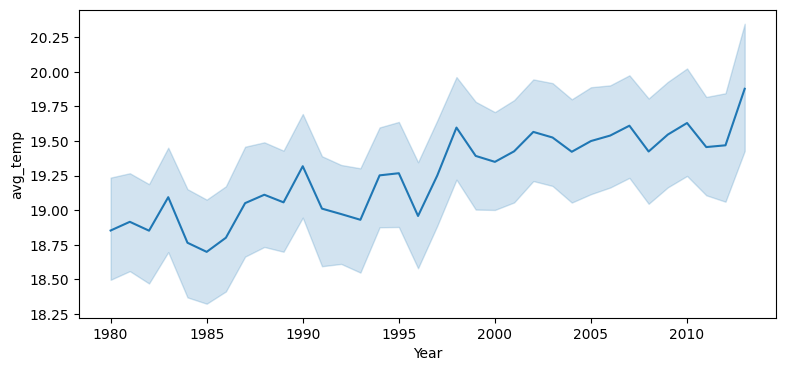

In [23]:
plt.figure(figsize=(9,4))
sns.lineplot(x='Year',y='avg_temp',data=latest_df)
plt.show()

In [24]:
resample_df = latest_df[['avg_temp']].resample('A').mean()

In [25]:
resample_df.head()

,avg_temp
Date,
1980-12-31,18.853321
1981-12-31,18.916136
1982-12-31,18.852169
1983-12-31,19.094044
1984-12-31,18.764961


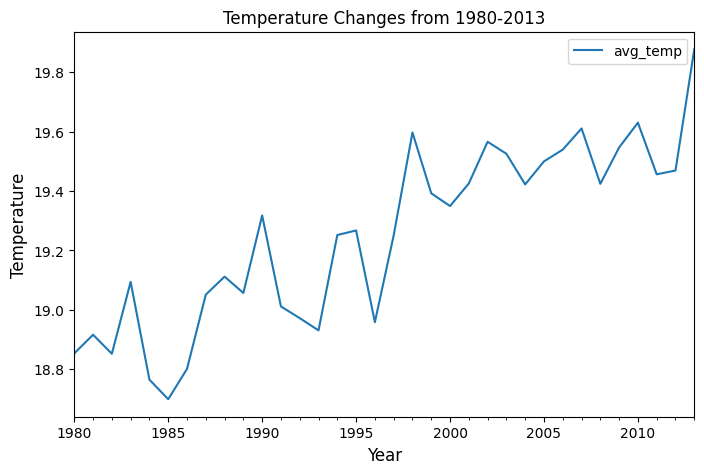

In [28]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [30]:
from statsmodels.tsa.stattools import adfuller

print("Test Results:")
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key, value in test_df[4].items():
  df_output['Critical Value (%s)'%key] = value
print(df_output)

Test Results:
Test Statistic                 -0.209246
p-value                         0.937411
Lags Used                       3.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(resample_df, period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

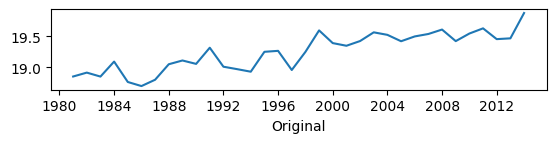

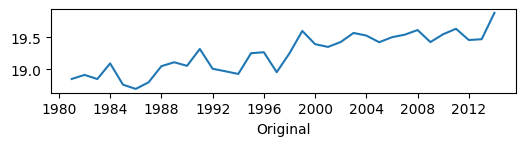

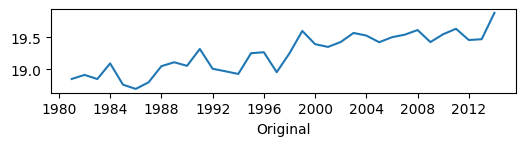

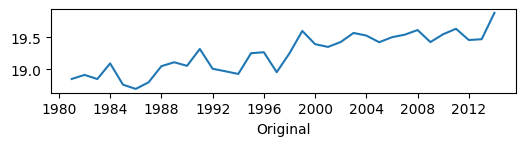

<Figure size 600x500 with 0 Axes>

In [35]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.tight_layout()

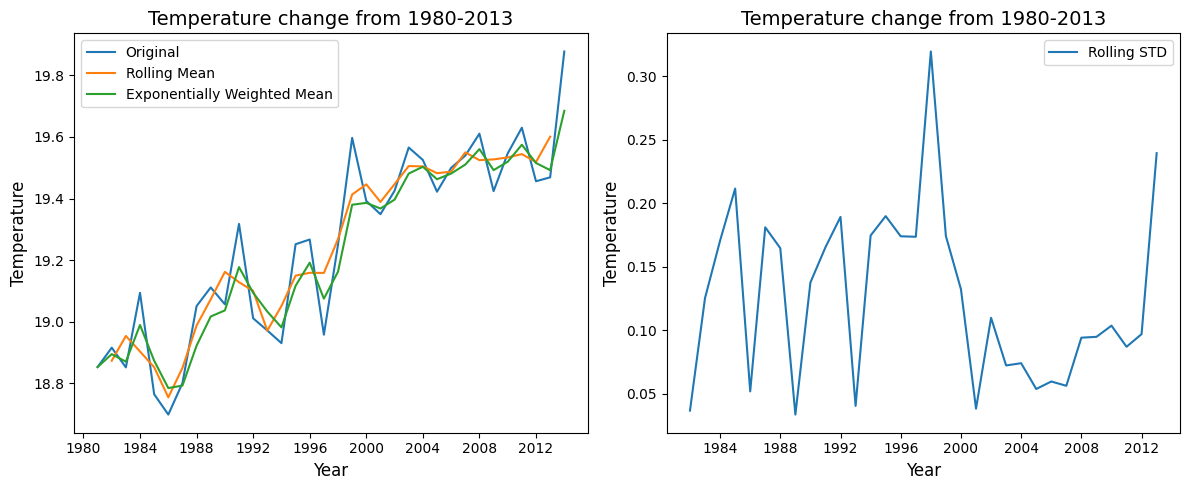

In [40]:
rol_mean= resample_df.rolling(window=3,center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')
ax1.set_title("Temperature change from 1980-2013",fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title("Temperature change from 1980-2013",fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()




In [37]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print('Dickey fuller test for the rolling mean: ')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
  df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey fuller test for the rolling mean: 
Test Statistic                 -0.777451
p-value                         0.825656
Lags Used                       0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [38]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
Date,
1981-12-31,0.042261
1982-12-31,-0.101948
1983-12-31,0.190320
1984-12-31,-0.087751
1985-12-31,-0.055950


In [39]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.020938
1982-12-31,-0.018441
1983-12-31,0.104269
1984-12-31,-0.108781


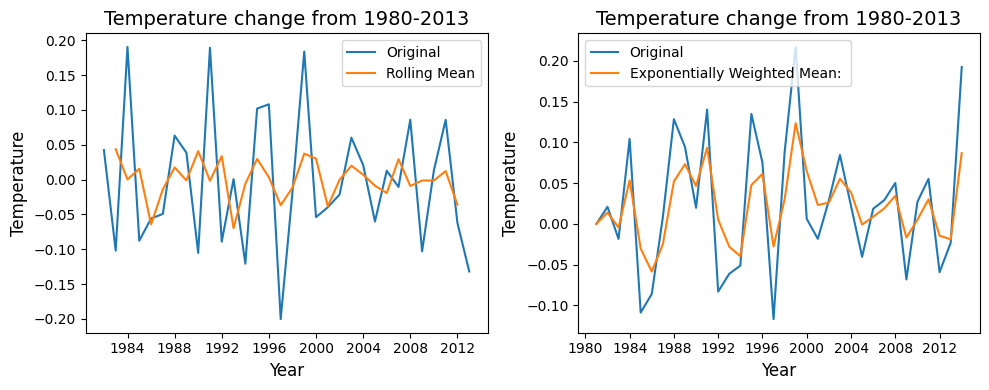

In [43]:
df_rol_mean_diff= diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title("Temperature change from 1980-2013",fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean: ')
ax2.set_title("Temperature change from 1980-2013",fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [44]:
print('Dickey fuller test for difference between original and rolling mean: ')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print('')
print('Dickey fuller test for difference between original and exponentially weighted mean: ')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey fuller test for difference between original and rolling mean: 
Test Statistic                 -5.317660
p-value                         0.000005
Lags Used                       3.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64

Dickey fuller test for difference between original and exponentially weighted mean: 
Test Statistic                -6.057144e+00
p-value                        1.237357e-07
Lags Used                      1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


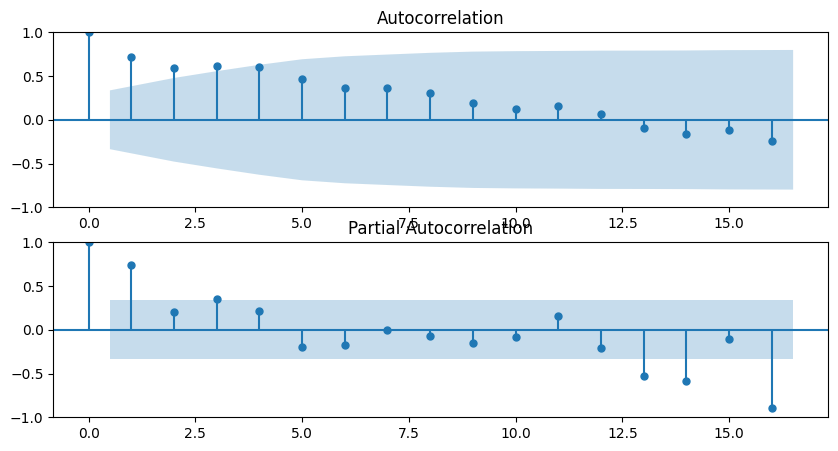

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()
